In [1]:
import re
import numpy as np
from tqdm.notebook import tqdm

with open("input/day24_input.txt", "r") as f:
    data = [l.rstrip() for l in f.readlines()]

In [2]:
tiles = [re.findall(r"(e|se|sw|w|nw|ne)", line) for line in data]
odd_mappings = {"e": (0, 1), "se": (1, 0), "sw": (1, -1), "w": (0, -1), "nw": (-1, -1), "ne": (-1, 0)}
even_mappings = {"e": (0, 1), "se": (1, 1), "sw": (1, 0), "w": (0, -1), "nw": (-1, 0), "ne": (-1, 1)}

In [3]:
floor = np.zeros((144, 144))

for tile in tiles:
    ref = [floor.shape[0] // 2, floor.shape[1] // 2]
    for i in tile:
        offset = even_mappings[i] if ref[0] % 2 == 0 else odd_mappings[i]
        ref = [sum(x) for x in zip(ref, offset)]
        
    floor[ref[0], ref[1]] = 1 - floor[ref[0], ref[1]]
    
np.sum(floor)

450.0

# Part 2

In [4]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

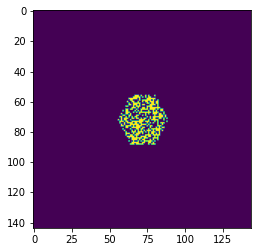

In [5]:
plt.imshow(floor);

In [6]:
def transform_tile(index, floor):
    row, col = index
    tile = floor[row, col]
    adjacent = 0
    mappings = even_mappings if row % 2 == 0 else odd_mappings
    
    for k, offset in mappings.items():
        a, b = row + offset[0], col + offset[1]
        
        if a < 0 or b < 0 or a > floor.shape[0] - 1 or b > floor.shape[1] - 1:
            continue
        
        if floor[a, b] == 1:
            adjacent += 1
            
    if (adjacent == 0 or adjacent > 2) and tile == 1:
        return 0
    elif adjacent == 2 and tile == 0:
        return 1
    else:
        return tile

In [7]:
all_floors = [floor]

for i in tqdm(range(100)):
    new_floor = np.zeros_like(floor)
    for index, item in np.ndenumerate(floor):
        new_floor[index] = transform_tile(index, floor)
    floor = new_floor
    all_floors.append(1 - floor)
    
print(np.sum(floor))


4059.0


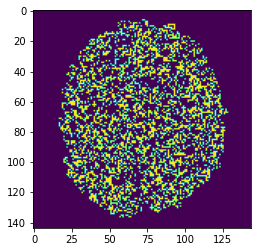

In [8]:
plt.imshow(new_floor);

In [9]:
import imageio

imageio.mimsave('tiles.gif', all_floors)

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0